In [6]:
import mediapipe as mp
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import roboflow
import json
import os

### Training Model

In [7]:
# # Load YOLOv8
# model = YOLO("yolov8n.pt")  # Có thể thay yolov8n bằng các phiên bản khác như yolov8s, yolov8m,...

# # Huấn luyện mô hình
# model.train(data="data.yaml", epochs=30, imgsz=640, batch=16)


### Load Model

In [8]:
# Load mô hình đã huấn luyện
model = YOLO("best.pt")  # Đường dẫn tới mô hình đã huấn luyện


0: 448x640 1 Crib, 140.3ms
Speed: 4.9ms preprocess, 140.3ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


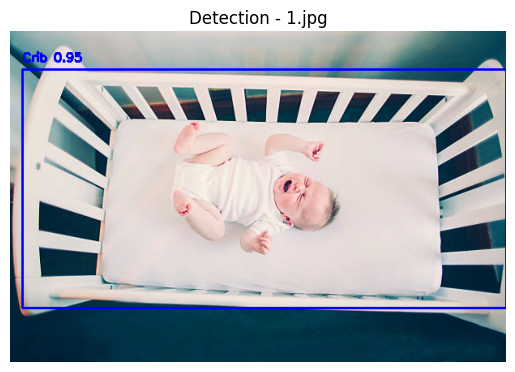


0: 448x640 1 Crib, 135.5ms
Speed: 10.1ms preprocess, 135.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


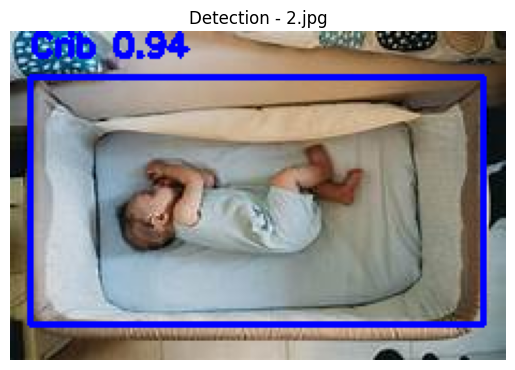


0: 448x640 1 Crib, 105.7ms
Speed: 5.0ms preprocess, 105.7ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


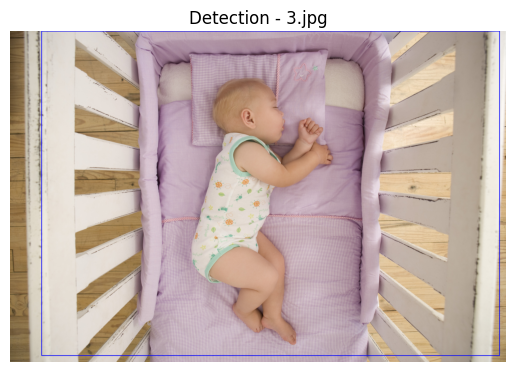


0: 416x640 1 Crib, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 5.9ms postprocess per image at shape (1, 3, 416, 640)


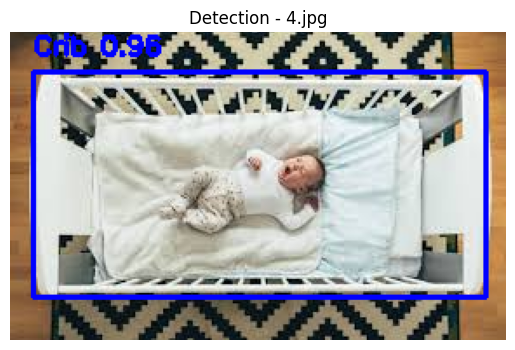


0: 448x640 1 Crib, 110.0ms
Speed: 0.0ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


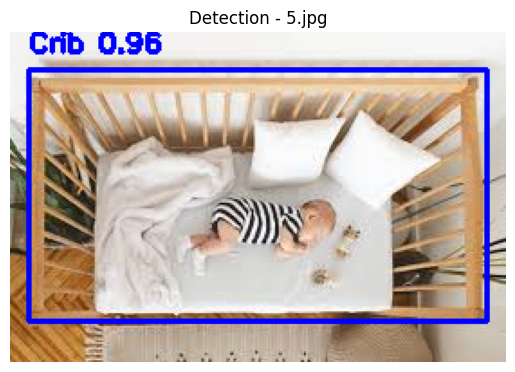


0: 448x640 1 Crib, 103.0ms
Speed: 0.0ms preprocess, 103.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


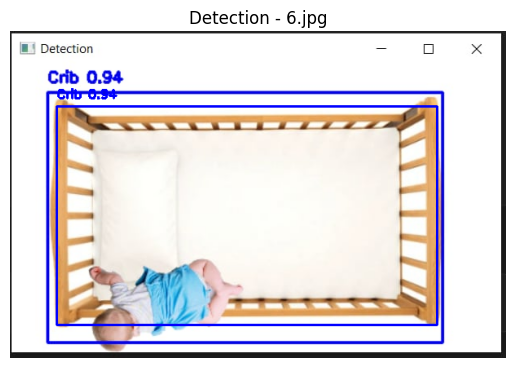

In [9]:
# Thư mục chứa các ảnh
image_folder = "datasets_testing"  # Thay bằng đường dẫn thư mục chứa ảnh

# Duyệt qua tất cả các ảnh trong thư mục
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    
    if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Đọc ảnh
        image = cv2.imread(image_path)

        # Dự đoán bounding box
        results = model.predict(image, conf=0.5)  # conf là ngưỡng tin cậy

        # Hiển thị kết quả
        for r in results:
            for box in r.boxes:
                if box.cls == 0:  # Lớp 'crib' là lớp đầu tiên
                    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Lấy tọa độ bounding box
                    conf = box.conf[0]  # Độ tin cậy
                    # Vẽ bounding box và nhãn
                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(image, f"Crib {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Hiển thị ảnh đã xử lý
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển BGR -> RGB
        plt.title(f"Detection - {image_name}")  # Thêm tiêu đề
        plt.axis('off')  # Tắt trục
        plt.show()

In [10]:
image_path = cv2.imread("datasets_testing/6.jpg")

Tọa độ vai trái (x, y): (143, 376)
Tọa độ vai phải (x, y): (135, 325)
Tọa độ hông trái (x, y): (227, 338)
Tọa độ hông phải (x, y): (222, 302)


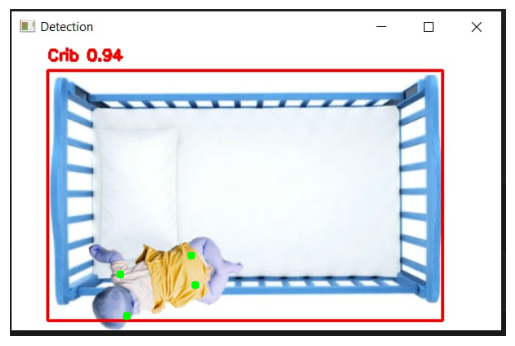

In [11]:
# Khởi tạo MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Đọc ảnh
rgb_image = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)

# Xử lý ảnh và lấy kết quả pose
baby_pose = pose.process(rgb_image)

if baby_pose.pose_landmarks:
    # Lấy tọa độ các điểm quan trọng
    left_shoulder = baby_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = baby_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    left_hip = baby_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP]
    right_hip = baby_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP]
    
    # Chuyển đổi tọa độ từ hệ tỷ lệ chuẩn sang pixel
    left_shoulder_x = int(left_shoulder.x * image_path.shape[1])  # Tọa độ x vai trái
    left_shoulder_y = int(left_shoulder.y * image_path.shape[0])  # Tọa độ y vai trái
    
    right_shoulder_x = int(right_shoulder.x * image_path.shape[1])  # Tọa độ x vai phải
    right_shoulder_y = int(right_shoulder.y * image_path.shape[0])  # Tọa độ y vai phải
    
    left_hip_x = int(left_hip.x * image_path.shape[1])  # Tọa độ x hông trái
    left_hip_y = int(left_hip.y * image_path.shape[0])  # Tọa độ y hông trái
    
    right_hip_x = int(right_hip.x * image_path.shape[1])  # Tọa độ x hông phải
    right_hip_y = int(right_hip.y * image_path.shape[0])  # Tọa độ y hông phải

    # In kết quả tọa độ
    print(f"Tọa độ vai trái (x, y): ({left_shoulder_x}, {left_shoulder_y})")
    print(f"Tọa độ vai phải (x, y): ({right_shoulder_x}, {right_shoulder_y})")
    print(f"Tọa độ hông trái (x, y): ({left_hip_x}, {left_hip_y})")
    print(f"Tọa độ hông phải (x, y): ({right_hip_x}, {right_hip_y})")
    
    # Hiển thị ảnh với các điểm được đánh dấu
    cv2.circle(image_path, (left_shoulder_x, left_shoulder_y), 5, (0, 255, 0), -1)
    cv2.circle(image_path, (right_shoulder_x, right_shoulder_y), 5, (0, 255, 0), -1)
    cv2.circle(image_path, (left_hip_x, left_hip_y), 5, (0, 255, 0), -1)
    cv2.circle(image_path, (right_hip_x, right_hip_y), 5, (0, 255, 0), -1)

    # Hiển thị ảnh bằng Matplotlib
    plt.imshow(image_path)
    plt.axis('off')  # Tắt trục
    plt.show()
else:
    print("Không phát hiện pose landmarks.")


Ảnh được đọc thành công từ datasets_testing/6.jpg


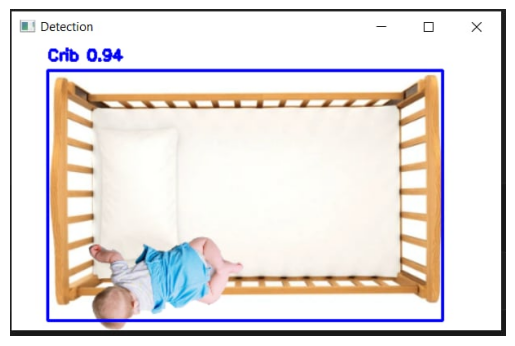

In [12]:
image_path = "datasets_testing/6.jpg"

# Đọc ảnh bằng OpenCV
image = cv2.imread(image_path)
if image is None:
    print(f"Không thể đọc ảnh từ {image_path}")
else:
    print(f"Ảnh được đọc thành công từ {image_path}")

# Chuyển ảnh từ BGR sang RGB (Matplotlib sử dụng RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh bằng Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Tắt trục
plt.show()



image 1/1 c:\Users\admin\IoT\IoT\datasets_testing\6.jpg: 448x640 1 Crib, 211.2ms
Speed: 4.0ms preprocess, 211.2ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)
Bounding Box: (57, 92, 524, 360) with confidence: 0.94


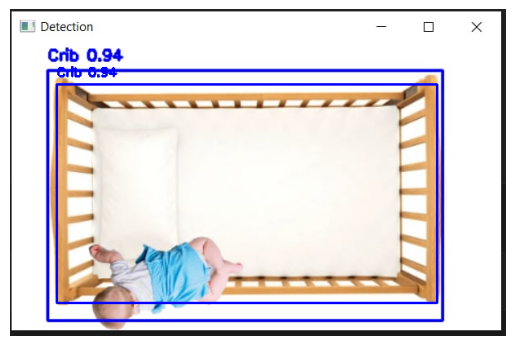

In [13]:
# Dự đoán với mô hình YOLO
results = model.predict("datasets_testing/6.jpg", conf=0.3)  # conf là ngưỡng tin cậy

# Hiển thị bounding box và các thông tin
for result in results:
    for box in result.boxes:
        # Kiểm tra lớp (class) của bounding box (lớp của thành nôi có thể là 0)
        if box.cls == 0:  # Lớp của thành nôi, ví dụ lớp 'crib'
            # Lấy tọa độ của bounding box (x1, y1) là góc trên bên trái và (x2, y2) là góc dưới bên phải
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Tọa độ của bounding box
            conf = box.conf[0]  # Độ tin cậy của bounding box
            
            # Gán tọa độ của bounding box vào các biến tương ứng
            crib_left_x = x1
            crib_top_y = y1
            crib_right_x = x2
            crib_bottom_y = y2

            # In ra tọa độ bounding box và độ tin cậy
            print(f"Bounding Box: ({crib_left_x}, {crib_top_y}, {crib_right_x}, {crib_bottom_y}) with confidence: {conf:.2f}")
            
            # Vẽ bounding box lên ảnh
            cv2.rectangle(image, (crib_left_x, crib_top_y), (crib_right_x, crib_bottom_y), (255, 0, 0), 2)
            cv2.putText(image, f"Crib {conf:.2f}", (crib_left_x, crib_top_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

  # Hiển thị ảnh với Matplotlib (Thay thế cv2.imshow để tránh lỗi)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Tắt trục
    plt.show()


In [14]:
# Kiểm tra xem các tọa độ của các điểm cơ thể có nằm trong bounding box của nôi hay không
def check_safety(left_shoulder_x, left_shoulder_y, right_shoulder_x, right_shoulder_y, 
                 left_hip_x, left_hip_y, right_hip_x, right_hip_y, 
                 crib_left_x, crib_top_y, crib_right_x, crib_bottom_y):
    # Kiểm tra xem các điểm cơ thể có nằm trong bounding box của nôi không
    is_safe = (
        crib_left_x <= left_shoulder_x <= crib_right_x and crib_top_y <= left_shoulder_y <= crib_bottom_y and
        crib_left_x <= right_shoulder_x <= crib_right_x and crib_top_y <= right_shoulder_y <= crib_bottom_y and
        crib_left_x <= left_hip_x <= crib_right_x and crib_top_y <= left_hip_y <= crib_bottom_y and
        crib_left_x <= right_hip_x <= crib_right_x and crib_top_y <= right_hip_y <= crib_bottom_y
    )
    return is_safe

# Kiểm tra an toàn
is_safe = check_safety(left_shoulder_x, left_shoulder_y, right_shoulder_x, right_shoulder_y,
                       left_hip_x, left_hip_y, right_hip_x, right_hip_y,
                       crib_left_x, crib_top_y, crib_right_x, crib_bottom_y)

if is_safe:
    print("Trẻ an toàn, các điểm cơ thể nằm trong nôi.")
else:
    print("Trẻ gặp nguy hiểm, các điểm cơ thể ngoài nôi.")

Trẻ gặp nguy hiểm, các điểm cơ thể ngoài nôi.
